Creating Basic msgs and tool binding

In [1]:
from typing_extensions import TypedDict
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

In [2]:
msg = [AIMessage(content="You said you are researching on ocean mammals?", name="Model")]
msg.append(HumanMessage(content=" Yes you are right?", name= "Pallavi"))
msg.append(AIMessage(content= "How can i help you?", name="Model"))
msg.append(HumanMessage(content="Can you please tell me where can we spot orca whale in US?", name= "Pallavi"))

In [4]:
for i in msg:
    i.pretty_print()

================================== Ai Message ==================================
Name: Model

You said you are researching on ocean mammals?
================================ Human Message =================================
Name: Pallavi

 Yes you are right?
================================== Ai Message ==================================
Name: Model

How can i help you?
================================ Human Message =================================
Name: Pallavi

Can you please tell me where can we spot orca whale in US?


In [8]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
from langchain_groq import ChatGroq

llm=ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

In [12]:
result=llm.invoke(msg)
result #[content]

AIMessage(content="Orcas (also known as killer whales) can be spotted in several locations along the US coastlines. Here are some popular spots:\n\n1. **Pacific Northwest**: Specifically, Washington state and Oregon. The San Juan Islands, Puget Sound, and the Columbia River are known habitats for orcas. You can take a guided tour or visit places like:\n\t* San Juan Islands National Historical Park, Washington\n\t* Olympic National Park, Washington\n\t* Oregon Coast, particularly around Cannon Beach and Ecola State Park\n2. **Alaska**: Orca sightings are common in Alaska's coastal waters, particularly around:\n\t* Kenai Fjords National Park\n\t* Prince William Sound\n\t* Inside Passage\n3. **California**: You can spot orcas along the California coast, especially:\n\t* Monterey Bay (Monterey Bay Aquarium offers whale-watching tours)\n\t* Big Sur coastline\n\t* Farallon Islands (near San Francisco)\n4. **Hawaii**: Although less common, orcas have been spotted in Hawaiian waters, particula

In [20]:
txt =result.content.replace('\\n\\n','\n\n')

In [22]:
print(txt)

Orcas (also known as killer whales) can be spotted in several locations along the US coastlines. Here are some popular spots:

1. **Pacific Northwest**: Specifically, Washington state and Oregon. The San Juan Islands, Puget Sound, and the Columbia River are known habitats for orcas. You can take a guided tour or visit places like:
	* San Juan Islands National Historical Park, Washington
	* Olympic National Park, Washington
	* Oregon Coast, particularly around Cannon Beach and Ecola State Park
2. **Alaska**: Orca sightings are common in Alaska's coastal waters, particularly around:
	* Kenai Fjords National Park
	* Prince William Sound
	* Inside Passage
3. **California**: You can spot orcas along the California coast, especially:
	* Monterey Bay (Monterey Bay Aquarium offers whale-watching tours)
	* Big Sur coastline
	* Farallon Islands (near San Francisco)
4. **Hawaii**: Although less common, orcas have been spotted in Hawaiian waters, particularly around:
	* Maui and the surrounding is

In [89]:
from langchain.tools import tool
@tool
def add(a:str,b:str)-> int:
    """Add a and b.

    Args:
        a: first int
        b: second int
    """
    return int(a)+int(b)

In [90]:
llm_with_tools=llm.bind_tools([add])

In [91]:

tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 100 plus 3?", name="pallavi")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '74t0vmd89', 'function': {'arguments': '{"a":"100","b":"3"}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 736, 'total_tokens': 771, 'completion_time': 0.096209573, 'completion_tokens_details': None, 'prompt_time': 0.027786084, 'prompt_tokens_details': None, 'queue_time': 0.048172226, 'total_time': 0.123995657}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_79da0e0073', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--6473d92b-d1bf-4316-b13a-737e5d1e5b0c-0', tool_calls=[{'name': 'add', 'args': {'a': '100', 'b': '3'}, 'id': '74t0vmd89', 'type': 'tool_call'}], usage_metadata={'input_tokens': 736, 'output_tokens': 35, 'total_tokens': 771})

In [92]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': '100', 'b': '3'},
  'id': '74t0vmd89',
  'type': 'tool_call'}]

In [93]:
tool_call_o = tool_call.tool_calls[0]
print("\nTOOL CALL:", tool_call_o)



TOOL CALL: {'name': 'add', 'args': {'a': '100', 'b': '3'}, 'id': '74t0vmd89', 'type': 'tool_call'}


In [94]:


# -----------------------------
# 5️⃣ Run the tool manually
# -----------------------------
tool_name = tool_call_o["name"]
tool_args = tool_call_o["args"]

# tool_name will be "add"
result = add.invoke(tool_args)

print("\nFINAL RESULT:", result)


FINAL RESULT: 103


Tool add is called by the llm.

In [74]:
msg_call=llm_with_tools.invoke([HumanMessage(content=f"what is the lifespan of orca ?", name="pallavi")])
print(msg_call.content)

The lifespan of orcas, also known as killer whales, varies depending on several factors such as their habitat, diet, and social status. In the wild, orcas can live for around 50-80 years, although some studies suggest that they can live up to 90 years or more. In captivity, their lifespan is typically shorter, ranging from 20-60 years. 

It's worth noting that different populations of orcas have different lifespans. For example, resident orcas, which feed on fish and other marine mammals, tend to live longer than transient orcas, which feed on marine mammals such as seals and other whales. 

If you have any more specific questions or would like more information, feel free to ask!


New msg are not appended to msg. It has to be done manually. 

In [73]:
for i in msg:
    i.pretty_print()

================================== Ai Message ==================================
Name: Model

You said you are researching on ocean mammals?
================================ Human Message =================================
Name: Pallavi

 Yes you are right?
================================== Ai Message ==================================
Name: Model

How can i help you?
================================ Human Message =================================
Name: Pallavi

Can you please tell me where can we spot orca whale in US?


In [95]:
msg.append(result)
msg.append(msg_call)

In [96]:
for i in msg:
    i.pretty_print()

================================== Ai Message ==================================
Name: Model

You said you are researching on ocean mammals?
================================ Human Message =================================
Name: Pallavi

 Yes you are right?
================================== Ai Message ==================================
Name: Model

How can i help you?
================================ Human Message =================================
Name: Pallavi

Can you please tell me where can we spot orca whale in US?
================================== Ai Message ==================================

The lifespan of orcas, also known as killer whales, varies depending on several factors such as their habitat, diet, and social status. In the wild, orcas can live for around 50-80 years, although some populations have been known to live up to 90 years or more. In captivity, their lifespan is typically shorter, ranging from 20-60 years. 

It's worth noting that different populations of orc

AttributeError: 'int' object has no attribute 'pretty_print'

### Creating chatbot using langgraph and tools

In [97]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

AnyMessage is a type that represents any kind of chat message:
- HumanMessage
- AIMessage
- SystemMessage
- ToolMessage
LangGraph often handles dynamic message lists, so we need a flexible type that covers all possible message types.

Annotated allows attaching metadata to a variable or field. LangGraph uses Annotated to attach state update modifiers like add_messages.

In [98]:
class MessageState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [99]:
initial_message=[AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on generative ai.", name="Krish")
                   ]
# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

add_messages(initial_message,new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='d213b199-2665-4792-8c9e-1ec9f734e953'),
 HumanMessage(content="I'm looking for information on generative ai.", additional_kwargs={}, response_metadata={}, name='Krish', id='a2ead964-8d49-4fc1-805c-e150435ebef2'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='65d5a6db-e4b5-4ae3-80ab-1b27cb56e024')]

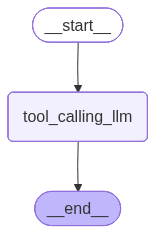

In [100]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
# Node
def tool_calling_llm(state: MessageState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessageState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [105]:
messages =graph.invoke({"messages":HumanMessage(content="What is 2 plus 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 2 plus 3
================================== Ai Message ==================================
Tool Calls:
  add (v632p3jz7)
 Call ID: v632p3jz7
  Args:
    a: 2
    b: 3


In [117]:
def multiply(a: str, b: str) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return int(a) * int(b)

In [141]:
llm_with_tools = llm.bind_tools([multiply,add])

In [113]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.graph import MessagesState

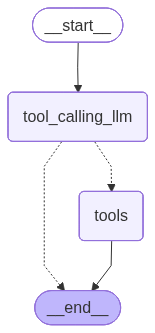

In [142]:
# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([multiply,add]))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)
#builder.add_edge("tool2", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [120]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Add 3 and 4. Multiply the output by 2 and add 5.")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4. Multiply the output by 2 and add 5.
================================== Ai Message ==================================
Tool Calls:
  add (h2wfh02hz)
 Call ID: h2wfh02hz
  Args:
    a: 3
    b: 4
  multiply (9db55f4qz)
 Call ID: 9db55f4qz
  Args:
    a: 7
    b: 2
  add (ygthw72g0)
 Call ID: ygthw72g0
  Args:
    a: 14
    b: 5
================================= Tool Message =================================
Name: add

7
================================= Tool Message =================================
Name: multiply

14
================================= Tool Message =================================
Name: add

19


In [144]:
messages = [HumanMessage(content="what are the nieghboring countries of germany?")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what are the nieghboring countries of germany?
================================== Ai Message ==================================

I don't have access to get_countries information. However, I can tell you that the neighboring countries of Germany are Denmark to the north, Poland and the Czech Republic to the east, Austria and Switzerland to the south, France, Luxembourg, Belgium, and the Netherlands to the west.
